In [128]:
# -------- BIBLIOTEKI -------- 

from IPython.display import Markdown as md
import mercury as mr

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import mean_squared_error, r2_score


#Zmienienie formatu zapisu danych numerycznych na dwie cyfry po przecinku.
pd.options.display.float_format = '{:.2f}'.format

#Wczytanie danych
df = pd.read_csv('insurance.csv')

In [129]:
app = mr.App(title="Prezentacja Projekt ML", description="Interaktywna aplikacja do prognozy progu ubezpieczenia") 

mercury.App

<center>
    <h1 style="color:#263a57; font-family:verdana;"> Jak kosztowne jest zdrowie? </h1>
    <h3> Interactive slides from notebook </h3>
    <h5> Gabriela Piwar </h5>
</center>

## Cel projektu

Określenie kosztów ubezpieczenia zdrowotnego na podstawie wybranych parametrów osobowych.

Stworzenie aplikacji do pomocy w wyznaczeniu progu ubezpieczenia.

In [130]:
display(md("# Zbiór danych"))
display(md('Zmiany etykiet smoker i sex na wartości 0 i 1'))

df.head()

# Zbiór danych

Zmiany etykiet smoker i sex na wartości 0 i 1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [131]:
# -------- ZMIANA ETYKIET -------- 

df = pd.read_csv('insurance.csv')

smoke = {'yes': 1,'no': 0}
sexes = {'female': 1,'male': 0}

print('Unique regions in dataset {}'.format(df.region.unique()))

df.smoker = [smoke[x] for x in df.smoker]
df.sex = [sexes[x] for x in df.sex]
df

Unique regions in dataset ['southwest' 'southeast' 'northwest' 'northeast']


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.92
1,18,0,33.77,1,0,southeast,1725.55
2,28,0,33.00,3,0,southeast,4449.46
3,33,0,22.70,0,0,northwest,21984.47
4,32,0,28.88,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0,30.97,3,0,northwest,10600.55
1334,18,1,31.92,0,0,northeast,2205.98
1335,18,1,36.85,0,0,southeast,1629.83
1336,21,1,25.80,0,0,southwest,2007.94


In [132]:
display(md("# Zbiór danych"))
display(md('Zmiany etykiet smoker i sex na wartości 0 i 1'))

df.head()

# Zbiór danych

Zmiany etykiet smoker i sex na wartości 0 i 1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.92
1,18,0,33.77,1,0,southeast,1725.55
2,28,0,33.00,3,0,southeast,4449.46
3,33,0,22.70,0,0,northwest,21984.47
4,32,0,28.88,0,0,northwest,3866.86


# Macierz korelacji

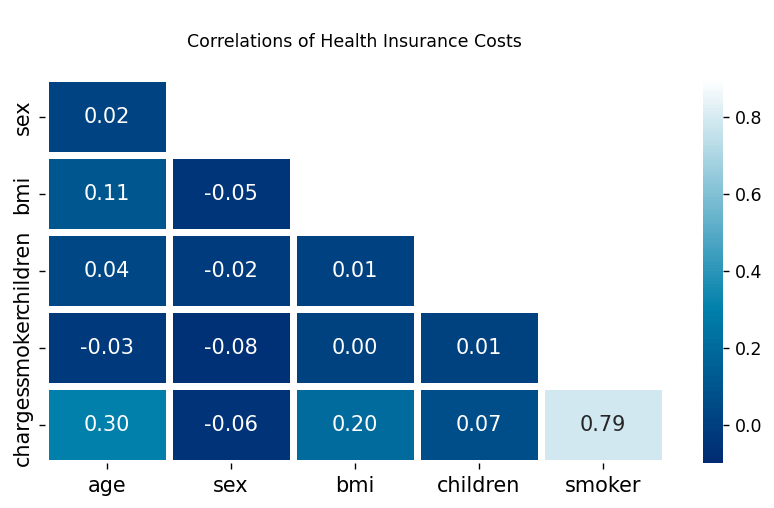

In [133]:
display(md("# Macierz korelacji"))

fig, ax = plt.subplots(figsize=(8,4), dpi = 125)   

mask = np.triu(np.ones_like(df.corr(numeric_only = True), dtype=bool))[1:, :-1]
corr = df.corr(numeric_only = True).iloc[1:,:-1].copy()

ax = sns.heatmap(corr, mask=mask, vmin=-.1, vmax=.9, center=0, annot=True, fmt='.2f', 
               cmap ='ocean', linewidths=4, annot_kws={"fontsize":12})

plt.title('\nCorrelations of Health Insurance Costs\n', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.show()

## Wykres

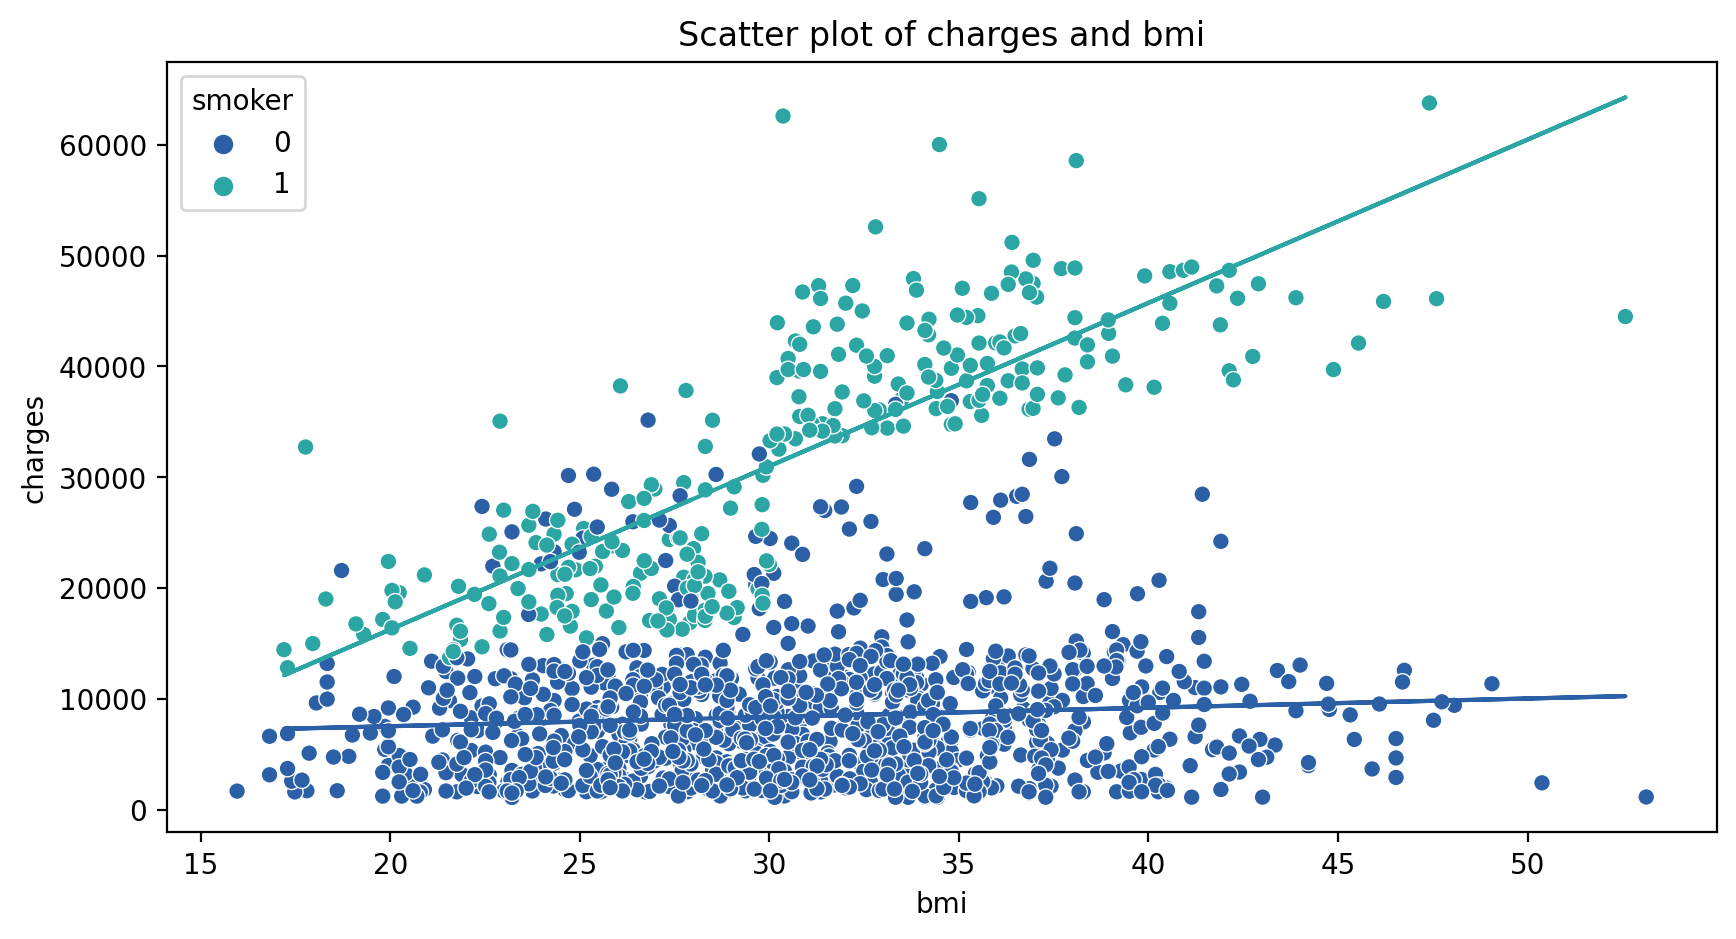

In [134]:
display(md("## Wykres"))

plt.figure(figsize=(10,5), dpi=200)

smoker_1 = np.polyfit(df[df.smoker==1].bmi, df[df.smoker==1].charges, 1)
smoker_0 = np.polyfit(df[df.smoker==0].bmi, df[df.smoker==0].charges, 1)

poly_1 = np.poly1d(smoker_1)
poly_0 = np.poly1d(smoker_0)

plt.plot(df[df.smoker==1].bmi, poly_1(df[df.smoker==1].bmi), '#2ba6a4')
plt.plot(df[df.smoker==1].bmi, poly_0(df[df.smoker==1].bmi), '#2b60a6')

ax = sns.scatterplot(x='bmi', y='charges', data = df, palette=['#2b60a6', '#2ba6a4'], hue='smoker')
ax.set_title('Scatter plot of charges and bmi')
plt.show()

#Dla palących zależność rosnąca, dla niepalących niezmienna

In [135]:
# add numeric widget AGE
age_input = mr.Slider(value=25, min = 18, max=70, label="Wiek", step=1)

mercury.Slider

In [150]:
# add numeric widget BMI
bmi_input = mr.Slider(value=20, min = 10, max=50, label="BMI", step=1)

mercury.Slider

In [137]:
# add numeric widget BMI
children_input = mr.Slider(value=0, min = 0, max=5, label="Dzieci", step=1)

mercury.Slider

In [148]:
# add checkbox
smoker_input = mr.Select(value="no", choices=['no', 'yes'], label="Pali")

mercury.Select

In [139]:
 # add select widget
sex_input = mr.Select(value="male", choices=['male', 'female'], label="Płeć")

mercury.Select

In [140]:
region_input = mr.Select(value="southeast", choices=['southeast', 'southwest', 'northeast', 'northwest'], label="Region")

mercury.Select

In [141]:
features_df= df.drop('charges', axis=1)

In [142]:
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex','smoker', 'region']

numeric_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))
])

full_processor_insurance = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('category', categorical_pipeline, categorical_features)
])

full_processor_insurance.fit(features_df)
full_processor_insurance.transform(features_df)
insurance_set_mod = pd.DataFrame(full_processor_insurance.transform(features_df), columns=full_processor_insurance.get_feature_names_out())

In [143]:
# Podział danych
X_train, X_test, y_train, y_test = train_test_split(features_df, df['charges'], test_size=0.2, random_state=123)

In [144]:
dtr_reg = Pipeline(steps=[
    ('preprocess', full_processor_insurance),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', DecisionTreeRegressor(max_depth=6, random_state=123))
])

dtr_reg.fit(X_train, y_train)

y_pred_train = dtr_reg.predict(X_train)
y_pred_test = dtr_reg.predict(X_test)

In [151]:
display(md("## Wprowadzone dane pacjenta"))
inputs = {'age': [age_input.value],
          'sex': [sex_input.value],
          'bmi': [bmi_input.value],
          'children': [children_input.value],
          'smoker': [smoker_input.value],
          'region': [region_input.value]}

inputs_df = pd.DataFrame(inputs)
display(inputs_df)

## Wprowadzone dane pacjenta

,age,sex,bmi,children,smoker,region
0,25,male,20,0,no,southeast


In [153]:
display(md("## Przewidywane koszty"))

y_pred_inputs = dtr_reg.predict(inputs_df)
display(y_pred_inputs[0])

## Przewidywane koszty

3271.3503702030443